# AB 8
## Load data + load model

In [59]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('rawdata_luftqualitaet.csv')


# Properties: humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside,state_air_quality
Y = df['state_air_quality']
X = df.drop(columns=['state_air_quality'])
print(X)
print(Y)

X_train, X_test, Y_Train, Y_Test = train_test_split(X, Y, test_size=.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



def getModel():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(60),
        keras.layers.Dense(60),
        keras.layers.Dense(3)
    ])

    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    return model

model = getModel()

#print(model.summary())


#print(X_train_scaled)


     humidity_inside  temperature_inside  co2_inside  temperature_heater  \
0              58.94              21.955        1653              41.187   
1              58.97              21.940        1665              40.937   
2              57.89              22.353        1707              40.375   
3              58.96              22.504        1981              40.875   
4              57.74              22.515        1868              40.812   
..               ...                 ...         ...                 ...   
911            37.92              21.714         891              24.312   
912            37.89              23.263        1165              52.250   
913            39.82              23.043        1348              48.812   
914            39.76              23.508        1470              51.375   
915            40.54              23.812        1701              51.562   

     temperature_wall_inside  
0                     14.062  
1                     14.

## train model

In [60]:
history = model.fit(
    X_train_scaled,
    Y_Train,
    epochs=200,
    validation_split=.2)


Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9954 - mae: 0.9954 - val_loss: 0.9181 - val_mae: 0.9181
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7028 - mae: 0.7028 - val_loss: 0.5822 - val_mae: 0.5822
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3450 - mae: 0.3450 - val_loss: 0.2553 - val_mae: 0.2553
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2377 - mae: 0.2377 - val_loss: 0.2376 - val_mae: 0.2376
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2176 - mae: 0.2176 - val_loss: 0.2464 - val_mae: 0.2464
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2101 - mae: 0.2101 - val_loss: 0.2373 - val_mae: 0.2373
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2189 - mae: 0.2189 - val_loss: 0.2330 - val_mae: 0.2330
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2070 - mae: 0.2070 - val_loss: 0.2370 - val_mae: 0.2370
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.205

In [61]:
def plot(hist, area):
    plt.plot(hist.history['loss'], label='train loss')
    plt.plot(hist.history['val_loss'], label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0,area)
    plt.show()

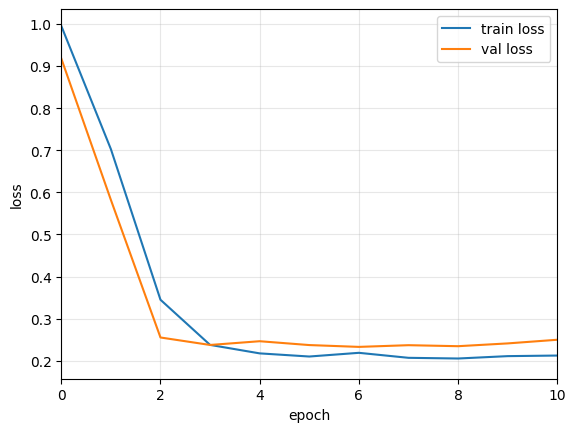

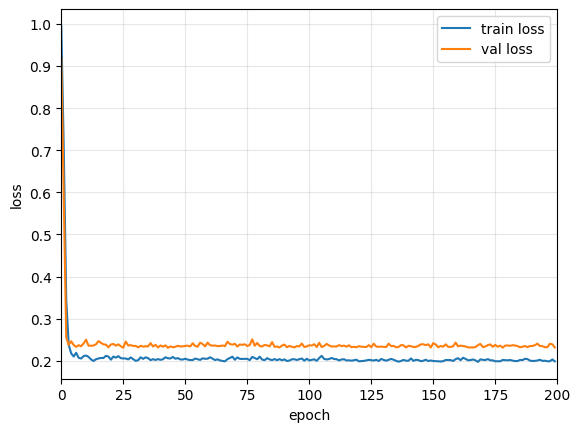

In [62]:
plot(history, 10)
plot(history, 200)

## Nr.2
### train model with callbacks

In [63]:
model = getModel()

callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(
    X_train_scaled,
    Y_Train,
    epochs=200,
    validation_split=.2,
    callbacks=[callbacks])

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0121 - mae: 1.0121 - val_loss: 0.8875 - val_mae: 0.8875
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7129 - mae: 0.7129 - val_loss: 0.6044 - val_mae: 0.6044
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4218 - mae: 0.4218 - val_loss: 0.3175 - val_mae: 0.3175
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2516 - mae: 0.2516 - val_loss: 0.2472 - val_mae: 0.2472
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2144 - mae: 0.2144 - val_loss: 0.2339 - val_mae: 0.2339
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2046 - mae: 0.2046 - val_loss: 0.2332 - val_mae: 0.2332
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2029 - mae: 0.2029 - val_loss: 0.2399 - val_mae: 0.2399
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2068 - mae: 0.2068 - val_loss: 0.2360 - val_mae: 0.2360
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.204

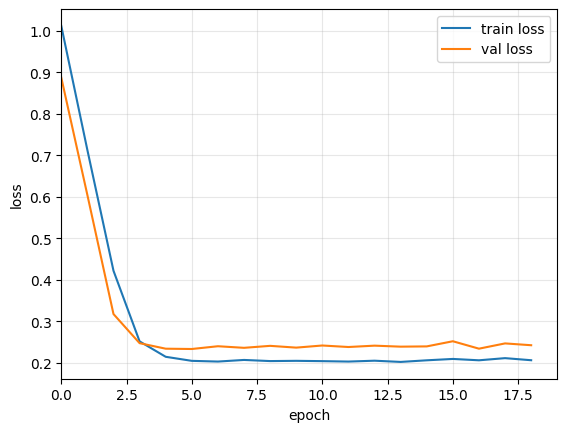

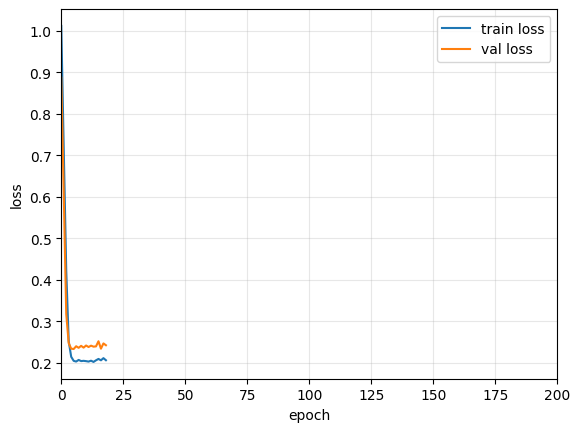

In [64]:
plot(history, len(history.epoch))
plot(history, 200)

## Nr.3 
### Model mit L2 Regularisation

In [65]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(60, kernel_regularizer=keras.regularizers.l2(.01)),
    keras.layers.Dense(60, kernel_regularizer=keras.regularizers.l2(.01)),
    keras.layers.Dense(3)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [66]:
history = model.fit(
    X_train_scaled,
    Y_Train,
    epochs=200,
    validation_split=.2)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6607 - mae: 1.0087 - val_loss: 1.5649 - val_mae: 0.9581
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3576 - mae: 0.7847 - val_loss: 1.2544 - val_mae: 0.7180
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9749 - mae: 0.4623 - val_loss: 0.8054 - val_mae: 0.3188
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7109 - mae: 0.2445 - val_loss: 0.6821 - val_mae: 0.2411
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6410 - mae: 0.2197 - val_loss: 0.6496 - val_mae: 0.2488
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5964 - mae: 0.2107 - val_loss: 0.6018 - val_mae: 0.2336
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5593 - mae: 0.2043 - val_loss: 0.5791 - val_mae: 0.2393
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5382 - mae: 0.2100 - val_loss: 0.5478 - val_mae: 0.2333
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.508

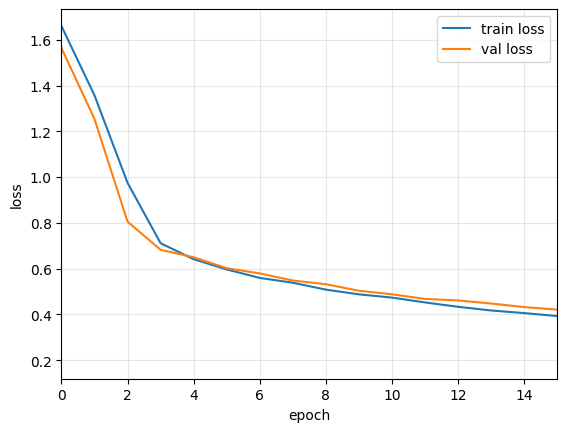

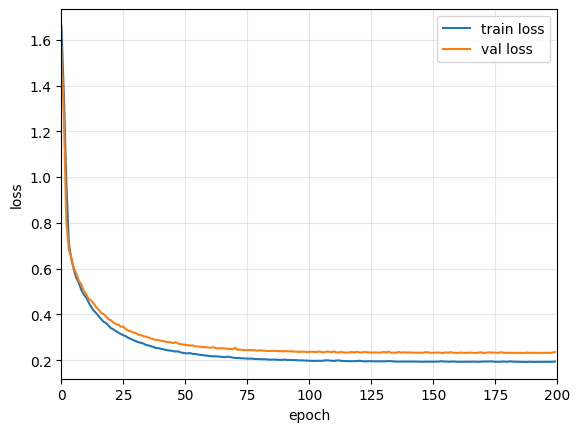

In [ ]:
plot(history, 200)